In [1]:
import pandas as pd
import itertools
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from lightgbm import LGBMClassifier
import os
import seaborn as sns
from wordcloud import wordcloud
import re
import pandas as pd
from urllib.parse import urlparse

In [2]:
import pandas as pd

dataset = pd.read_csv('C:/Users/adars/OneDrive/Documents/URL/malicious_phish.csv')



C:\Users\adars\AppData\Local\Temp\ipykernel_23076\3761754433.py:3: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('C:/Users/adars/OneDrive/Documents/URL/malicious_phish.csv')


In [3]:
dataset.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [4]:
dataset.type.value_counts()

type
benign        37416
defacement     9362
phishing       3000
malware        1221
Name: count, dtype: int64

In [5]:
dataset.shape

(573452, 2)

NOW HERE IS THE PLOTTING WORDCLOUD

In [6]:
dataset_phish=dataset[dataset.type=='phishing']
dataset_benign=dataset[dataset.type=='benign']

dataset_malware=dataset[dataset.type=='malware']
dataset_defacement=dataset[dataset.type=='defacement']


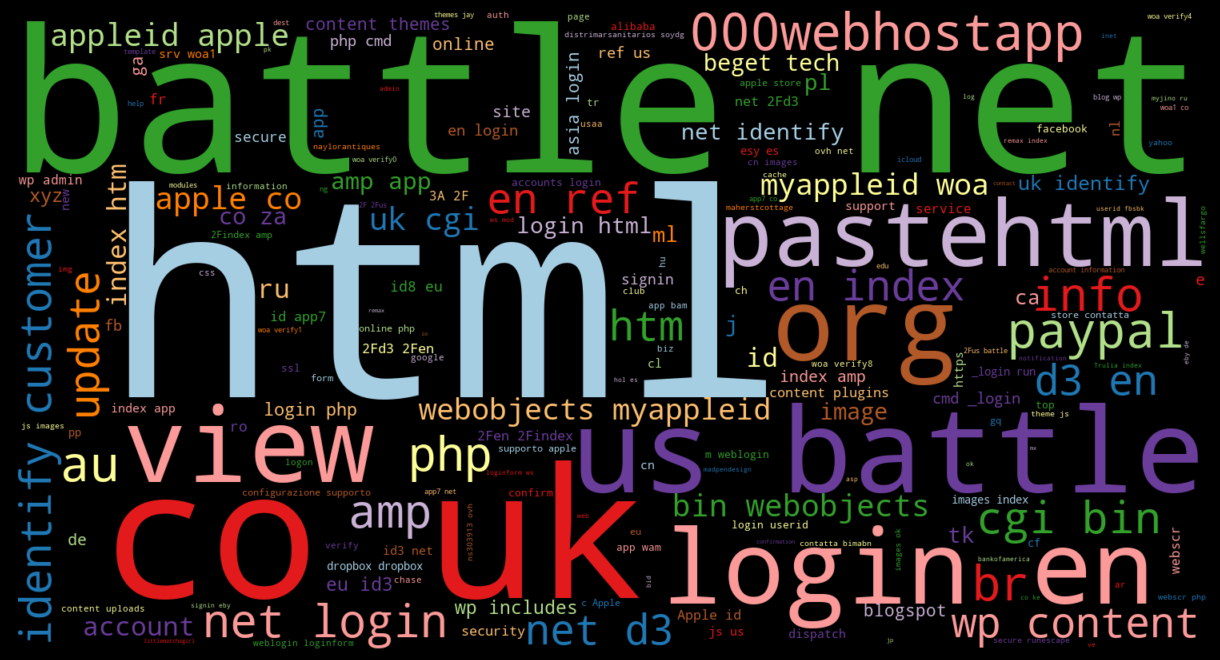

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a list of URLs stored in `dataset.phish_url` and want to join them
phish_url = " ".join(i for i in dataset_phish.url)

# Create a WordCloud object
wordcloud = WordCloud(width=1500, height=800, colormap='Paired').generate(phish_url)

# Create a figure and set its size and background color
plt.figure(figsize=(12, 14), facecolor='k')

# Display the word cloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Use parentheses instead of curly braces for 'off'

# Adjust layout and display the plot
plt.tight_layout(pad=0)
plt.show()


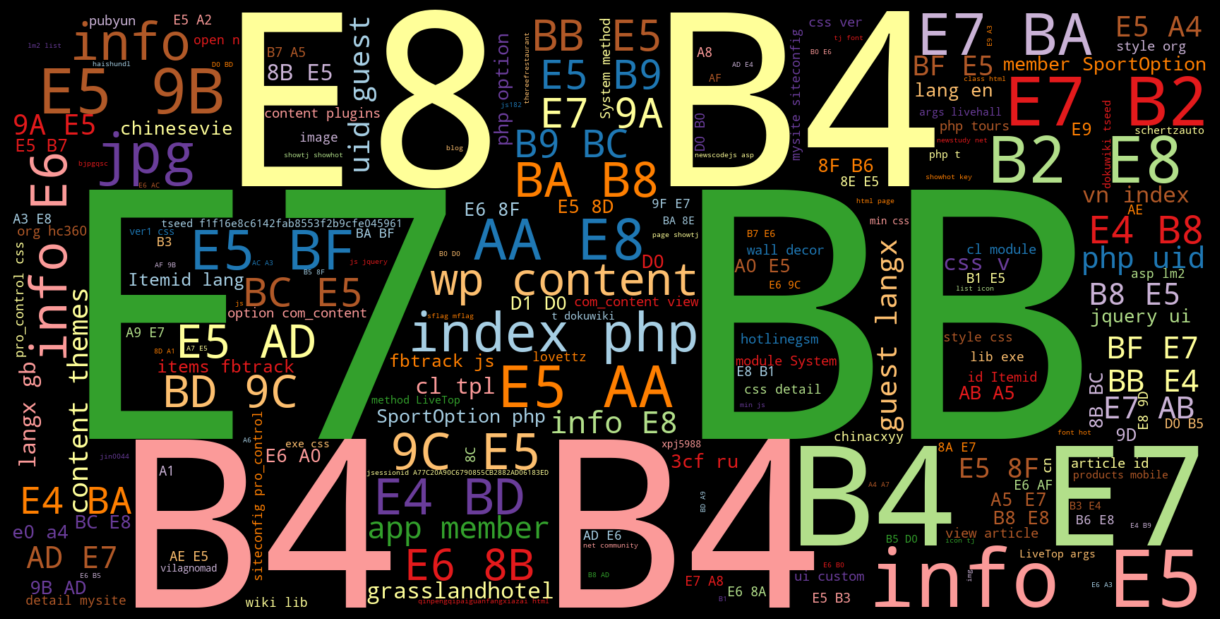

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a list of URLs stored in `dataset_malware_url` and want to join them
malware_url = " ".join(i for i in dataset_malware.url)

# Create a WordCloud object
wordcloud = WordCloud(width=1700, height=850, colormap='Paired').generate(malware_url)

# Create a figure and set its size and background color
plt.figure(figsize=(12, 14), facecolor='k')

# Display the word cloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Use parentheses instead of curly braces for 'off'

# Adjust layout and display the plot
plt.tight_layout(pad=0)
plt.show()


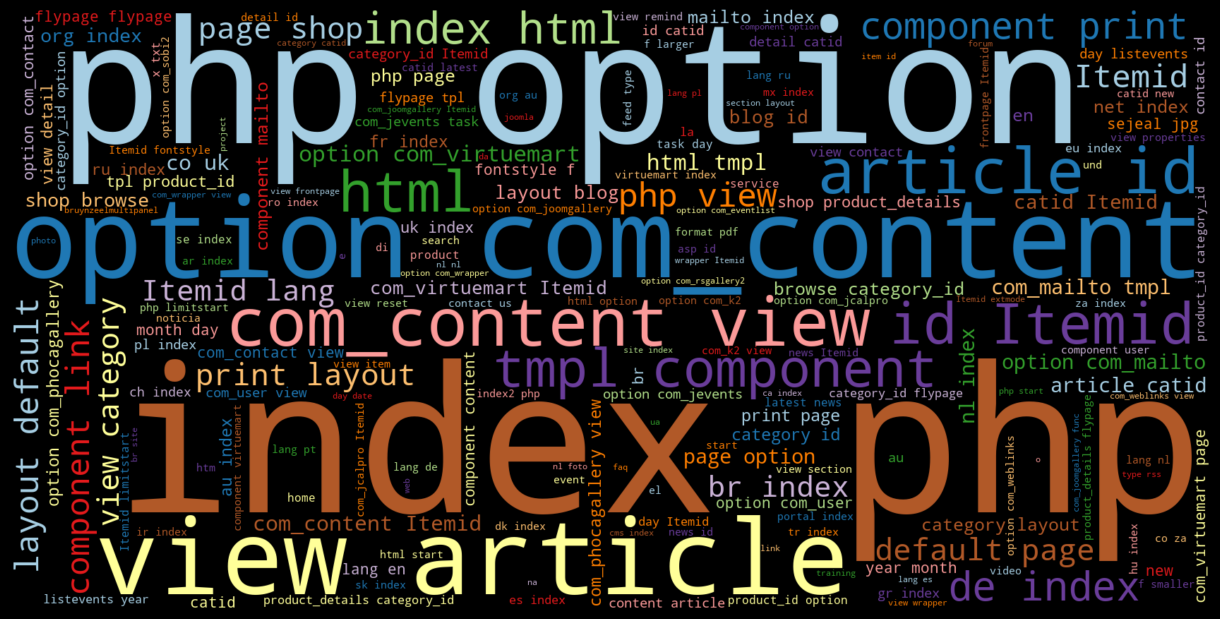

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a list of URLs stored in `dataset_defacement.url` and want to join them
defacement_url = " ".join(i for i in dataset_defacement.url)

# Create a WordCloud object
wordcloud = WordCloud(width=1700, height=850, colormap='Paired').generate(defacement_url)

# Create a figure and set its size and background color
plt.figure(figsize=(12, 14), facecolor='k')

# Display the word cloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Use parentheses instead of curly braces for 'off'

# Adjust layout and display the plot
plt.tight_layout(pad=0)
plt.show()


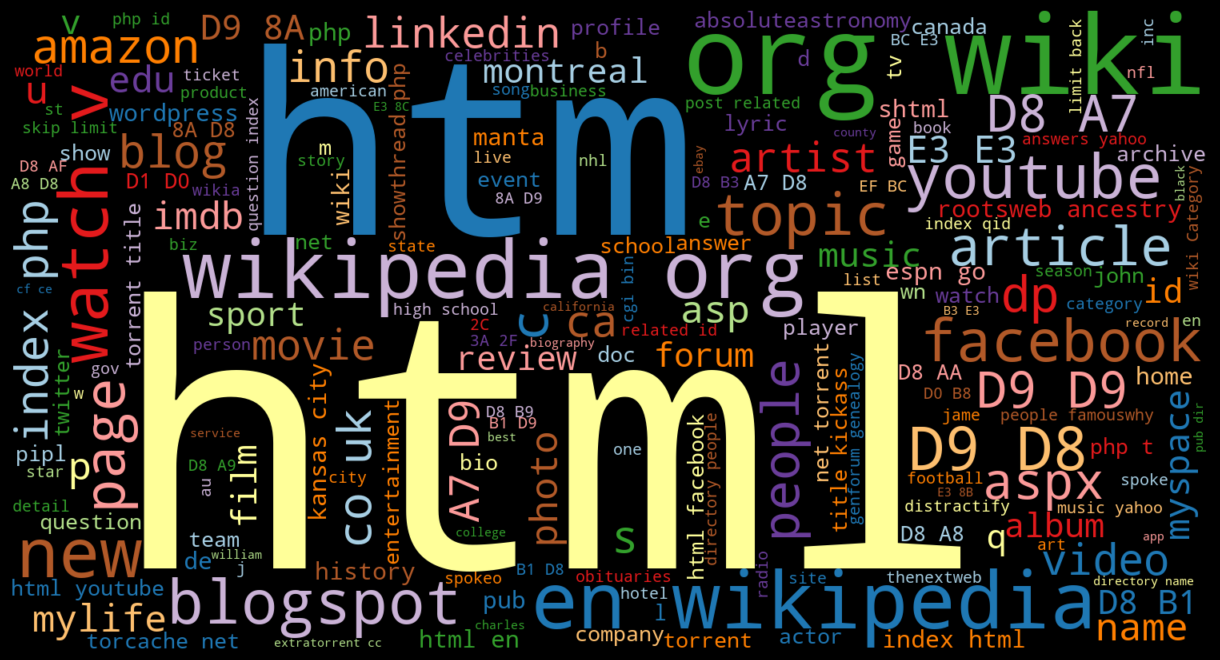

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a list of URLs stored in `dataset.phish_url` and want to join them
benign_url = " ".join(i for i in dataset_benign.url)

# Create a WordCloud object
wordcloud = WordCloud(width=1500, height=800, colormap='Paired').generate(benign_url)

# Create a figure and set its size and background color
plt.figure(figsize=(12, 14), facecolor='k')

# Display the word cloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Use parentheses instead of curly braces for 'off'

# Adjust layout and display the plot
plt.tight_layout(pad=0)
plt.show()


NOW WE ARE GOING FOR THE "FEATURE ENGINEERING"

In [11]:
import re

# Function to check if a URL contains an IP address (IPv4 or IPv6)
def having_ip_address(url):
    match =  re.sub(
        r'(([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.'
        r'([01]?\d\d?|2[0-4]\d|25[0-5])\/)|'
        r'((0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\))'
        r'(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', '',str(url))
    if match == url:
          return 1
    else:
          return 0

# Example usage:
# Replace 'dataset' with your actual dataset
dataset['use_of_ip'] = dataset['url'].apply(lambda i: having_ip_address(i))


In [12]:
from urllib.parse import urlparse
import re



In [13]:
import pandas as pd
from urllib.parse import urlparse
import re

def abnormal_url(url):
    if pd.isna(url):  # Check if URL is NaN
        return 0  # Or handle as appropriate
    
    # Get the hostname from the URL
    hostname = urlparse(url).hostname
    if hostname is None:
        return 0  # Or handle as appropriate

    hostname = str(hostname)

    # Check if the hostname contains any unusual patterns (customize this logic)
    match = re.search(r'your_pattern_here', hostname)

    # Check if a match was found
    if match:
        return 1  # Abnormal URL
    else:
        return 0  # Normal URL

# Assuming you have a DataFrame called 'dataset' with a 'url' column
dataset['abnormal_url'] = dataset['url'].apply(abnormal_url)


In [14]:
!pip install googlesearch.python


In [15]:
from googlesearch import search

In [16]:
def google_index(url):
  site=search(url,5)
  return 1 if site else 0
  dataset['google_index'] = dataset['url'].apply(lambda i: google_index(i))

In [17]:
dataset.head()

,url,type,use_of_ip,abnormal_url
0,br-icloud.com.br,phishing,1,0
1,mp3raid.com/music/krizz_kaliko.html,benign,1,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,1,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,0


In [18]:
def count_dot(url):
    if pd.isna(url):  # Check if URL is NaN
        return 0  # Or handle as appropriate
    if not isinstance(url, str):  # Ensure URL is a string
        return 0  # Or handle as appropriate

    # Count dots in the string URL
    count_dot = url.count('.')
    return count_dot

# Apply the function to the 'url' column
dataset['count.'] = dataset['url'].apply(count_dot)


In [19]:
dataset.head()

,url,type,use_of_ip,abnormal_url,count.
0,br-icloud.com.br,phishing,1,0,2
1,mp3raid.com/music/krizz_kaliko.html,benign,1,0,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,1,0,2
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,0,3
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,0,2


In [20]:
dataset.tail()

,url,type,use_of_ip,abnormal_url,count.
573447,NaN,NaN,0,0,0
573448,NaN,NaN,0,0,0
573449,NaN,NaN,0,0,0
573450,NaN,NaN,0,0,0
573451,NaN,NaN,0,0,0


In [21]:
dataset.count()

url              50999
type             50999
use_of_ip       573452
abnormal_url    573452
count.          573452
dtype: int64

In [22]:
import pandas as pd
import re
from urllib.parse import urlparse

def count_www(url):
    if pd.isna(url) or not isinstance(url, str):  # Check if URL is NaN or not a string
        return 0
    return url.count('www')

dataset['count-www'] = dataset['url'].apply(count_www)

# Function to count the occurrence of '@' in the URL
def count_atrate(url):
    if pd.isna(url) or not isinstance(url, str):  # Check if URL is NaN or not a string
        return 0
    return url.count('@')

dataset['count@'] = dataset['url'].apply(count_atrate)

# Function to count the number of directories in the URL
def no_of_dir(url):
    if pd.isna(url) or not isinstance(url, str):  # Check if URL is NaN or not a string
        return 0
    urldir = urlparse(url).path
    return urldir.count('/')

dataset['count_dir'] = dataset['url'].apply(no_of_dir)

# Function to count the occurrence of '//' in the URL
def no_of_embed(url):
    if pd.isna(url) or not isinstance(url, str):  # Check if URL is NaN or not a string
        return 0
    urldir = urlparse(url).path
    return urldir.count('//')

dataset['count_embed_domain'] = dataset['url'].apply(no_of_embed)

# Function to detect shortening services in the URL
def shortening_services(url):
    if pd.isna(url) or not isinstance(url, str):  # Check if URL is NaN or not a string
        return 0
    match = re.search(r'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gd|'
                      r'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipur1\.com|'
                      r'short\.to|BudURL\.com|ping\.fm|post\.ly|just\.as|bkite\.com|snipr\.com|fic\.kr|1oopt\.us|'
                      r'doiop\.com|short\.ie|k1\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|1nkd\.in|'
                      r'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.1v|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      r'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzur1\.com|cutt\.us|u\.bb|yourls\.org|'
                      r'x\.co|preetylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|lurl\.com|tweez\.me|v\.gd|'
                      r'tr\.im|link\.zip\.net',
                      url)

    if match:
        return 1
    else:
        return 0

dataset['short_url'] = dataset['url'].apply(shortening_services)


In [23]:
import pandas as pd

def count_https(url):
    if pd.isna(url) or not isinstance(url, str):  # Check if URL is NaN or not a string
        return 0
    return url.count('https')

dataset['count-https'] = dataset['url'].apply(count_https)

def count_http(url):
    if pd.isna(url) or not isinstance(url, str):  # Check if URL is NaN or not a string
        return 0
    return url.count('http')

dataset['count-http'] = dataset['url'].apply(count_http)


In [24]:
def count_per(url):
  return url.count('%')

  dataset['count%'] = dataset['url'].apply(lambda i: count_per(i))

def count_ques(url):
  return url.count('?')

  dataset['count?'] = dataset['url'].apply(lambda i: count_ques(i))

def count_hyphen(url):
  return url.count('-')


  dataset['count-'] = dataset['url'].apply(lambda i: count_hyphen(i))

def count_equal(url):
  return url.count('=')

  dataset['count='] = dataset['url'].apply(lambda i: count_equal(i))


def url_length(url):
  return len(str(url))

  dataset['url_length'] = dataset['url'].apply(lambda i: url_length(i))


def hostname_length(url):
  return len(urlparse(url))

  dataset['hostname_length'] = dataset['url'].apply(lambda i: hostname_length(i))


def suspicious_words(url):
  match = re.search( ' paypal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webser' , url)
  if match:
    return 1
  else:
    return  0

  dataset['sus_url'] = dataset['url'].apply(lambda i: suspicious_words(i))

def digit_count(url):
  digits=0
  for i in url:
    if i.isnumeric():
      digits = digits+1
    return digits
  dataset['count-digit'] = dataset['url'].apply(lambda i: digit_count(i))

def letter_count(url):
  letters=0
  for i in url:
    if i.isalpha():
      letters=letters+1
      return letters

  dataset['count-letters'] = dataset['url'].apply(lambda i: letter_count(i))



In [25]:
dataset.head()


,url,type,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domain,short_url,count-https,count-http
0,br-icloud.com.br,phishing,1,0,2,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,1,0,2,0,0,2,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,1,0,2,0,0,3,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,0,3,1,0,1,0,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,0,2,0,0,1,0,0,0,1


In [26]:
# Correct way to get the shape of the DataFrame
dataset_shape = dataset.shape
print(dataset_shape)


(573452, 12)


In [27]:
pip install tld

Note: you may need to restart the kernel to use updated packages.


In [28]:
from urllib.parse import urlparse
from tld import get_tld
import pandas as pd

# First directories length
def fd_length(url):
    if pd.isna(url) or not isinstance(url, str):  # Check if URL is NaN or not a string
        return 0
    urlpath = urlparse(url).path
    try:
        return len(urlpath.split('/')[1]) if len(urlpath.split('/')) > 1 else 0
    except IndexError:
        return 0

dataset['fd_length'] = dataset['url'].apply(fd_length)

# Length of top-level domain
def tld_length(tld):
    if pd.isna(tld) or not isinstance(tld, str):  # Check if TLD is NaN or not a string
        return -1
    return len(tld)

# Safely get the TLD
def safe_get_tld(url):
    if pd.isna(url) or not isinstance(url, str):  # Check if URL is NaN or not a string
        return None
    try:
        return get_tld(url, fail_silently=True)
    except Exception as e:
        return None

dataset['tld'] = dataset['url'].apply(safe_get_tld)
dataset['tld_length'] = dataset['tld'].apply(tld_length)


In [29]:
dataset.head()

,url,type,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domain,short_url,count-https,count-http,fd_length,tld,tld_length
0,br-icloud.com.br,phishing,1,0,2,0,0,0,0,0,0,0,0,None,-1
1,mp3raid.com/music/krizz_kaliko.html,benign,1,0,2,0,0,2,0,0,0,0,5,None,-1
2,bopsecrets.org/rexroth/cr/1.htm,benign,1,0,2,0,0,3,0,0,0,0,7,None,-1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,0,3,1,0,1,0,0,0,1,9,be,2
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,0,2,0,0,1,0,0,0,1,9,net,3


In [30]:
# Drop the 'tld' column
dataset = dataset.drop('tld', axis=1)


In [31]:
dataset.columns

Index(['url', 'type', 'use_of_ip', 'abnormal_url', 'count.', 'count-www',
       'count@', 'count_dir', 'count_embed_domain', 'short_url', 'count-https',
       'count-http', 'fd_length', 'tld_length'],
      dtype='object')

In [32]:
dataset['type'].value_counts()

type
benign        37416
defacement     9362
phishing       3000
malware        1221
Name: count, dtype: int64

EDA

1) Dostribution pf use_of_ip

c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

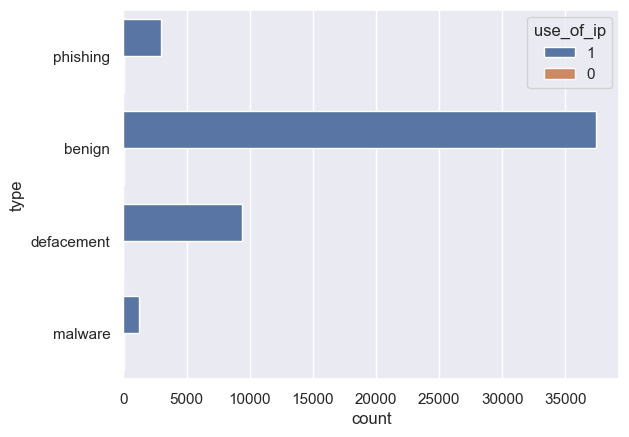

url                   object
type                  object
use_of_ip             object
abnormal_url           int64
count.                 int64
count-www              int64
count@                 int64
count_dir              int64
count_embed_domain     int64
short_url              int64
count-https            int64
count-http             int64
fd_length              int64
tld_length             int64
dtype: object


In [33]:
# Ensure 'use_of_ip' column is categorical
dataset['use_of_ip'] = dataset['use_of_ip'].astype(str)
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')

# Create the countplot
ax = sns.countplot(y='type', data=dataset, hue='use_of_ip')

# Show the plot
plt.show()
print(dataset.dtypes)


c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

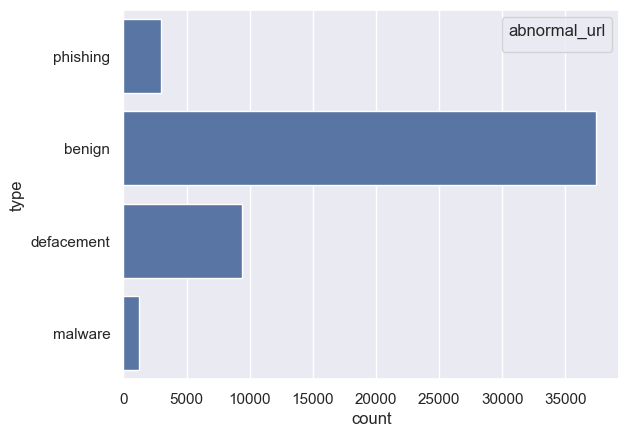

In [34]:

sns.set(style='darkgrid')
ax = sns.countplot(y = 'type', data=dataset,hue='abnormal_url')

c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

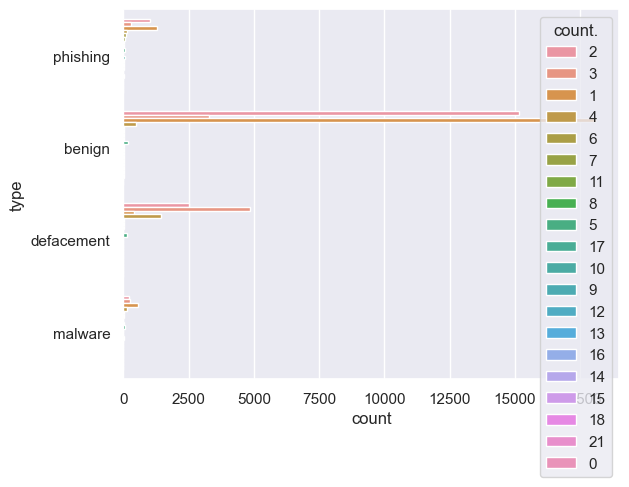

['2' '3' '1' '4' '6' '7' '11' '8' '5' '17' '10' '9' '12' '13' '16' '14'
 '15' '18' '21' '0']


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'count.' column to string type
dataset['count.'] = dataset['count.'].astype(str)

# Set Seaborn style
sns.set(style='darkgrid')

# Create the countplot
ax = sns.countplot(y='type', data=dataset, hue='count.')

# Show the plot
plt.show()
# Print unique values in the 'count.' column to inspect data
print(dataset['count.'].unique())

# Optional: Handle missing values if necessary
dataset['count.'].fillna('Unknown', inplace=True)


c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

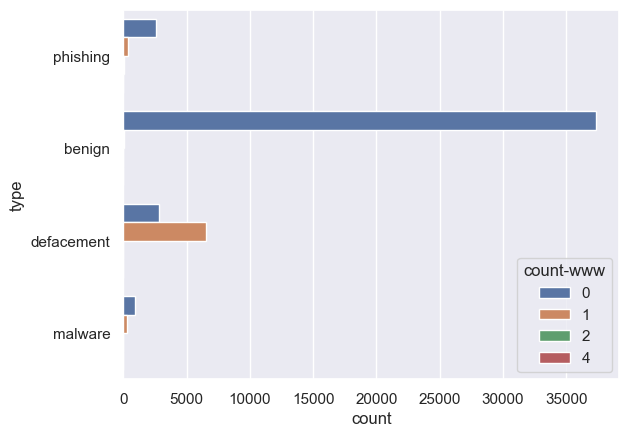

['0' '1' '2' '4']
['phishing' 'benign' 'defacement' 'malware' nan]


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'count-www' column to string type
dataset['count-www'] = dataset['count-www'].astype(str)

# Set Seaborn style
sns.set(style='darkgrid')

# Create the countplot
ax = sns.countplot(y='type', data=dataset, hue='count-www')

# Show the plot
plt.show()
# Print unique values in the 'count-www' column to check data
print(dataset['count-www'].unique())

# Optional: Handle missing values if necessary
dataset['count-www'].fillna('Unknown', inplace=True)
# Print unique values in the 'type' column to check data
print(dataset['type'].unique())


c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

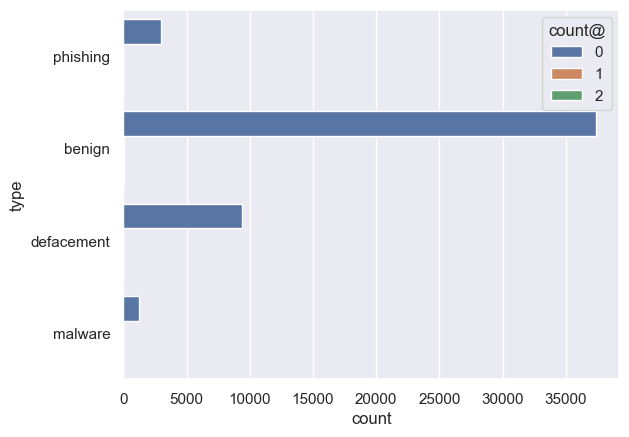

['0' '1' '2']


c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

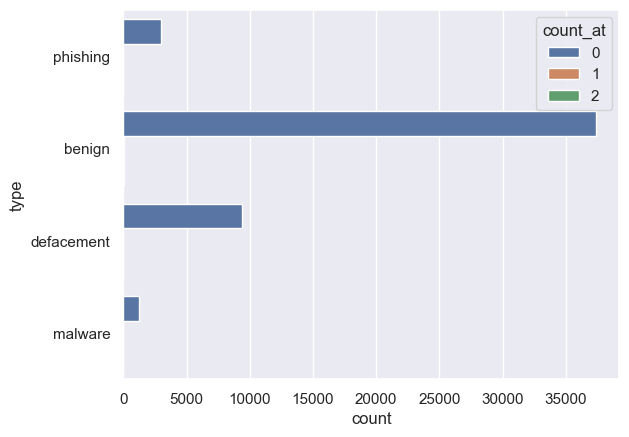

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'count@' column to string type
dataset['count@'] = dataset['count@'].astype(str)

# Set Seaborn style
sns.set(style='darkgrid')

# Create the countplot
ax = sns.countplot(y='type', data=dataset, hue='count@')

# Show the plot
plt.show()
# Print unique values in the 'count@' column to check data
print(dataset['count@'].unique())

# Handle missing values if necessary
dataset['count@'].fillna('Unknown', inplace=True)
# Rename column to avoid special characters
dataset.rename(columns={'count@': 'count_at'}, inplace=True)

# Create the countplot with the renamed column
ax = sns.countplot(y='type', data=dataset, hue='count_at')

# Show the plot
plt.show()


c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

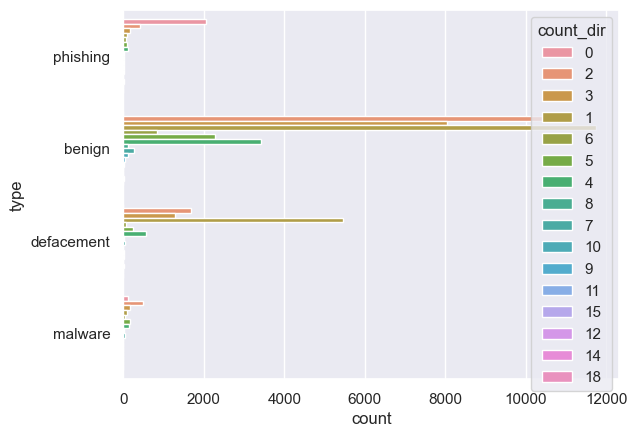

['0' '2' '3' '1' '6' '5' '4' '8' '7' '10' '9' '11' '15' '12' '14' '18']


c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

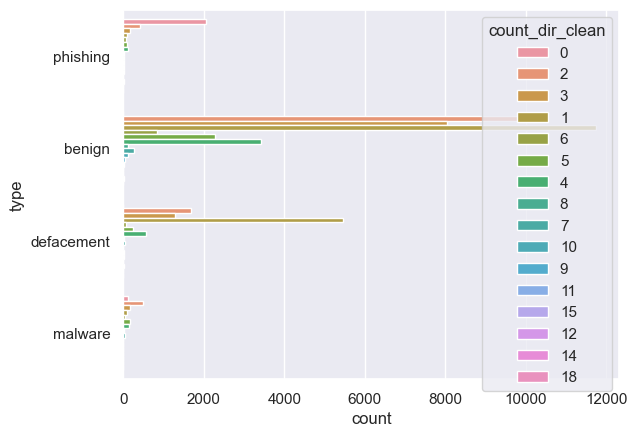

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'count_dir' column to string type
dataset['count_dir'] = dataset['count_dir'].astype(str)

# Set Seaborn style
sns.set(style='darkgrid')

# Create the countplot
ax = sns.countplot(y='type', data=dataset, hue='count_dir')

# Show the plot
plt.show()
# Print unique values in the 'count_dir' column to check data
print(dataset['count_dir'].unique())

# Handle missing values if necessary
dataset['count_dir'].fillna('Unknown', inplace=True)
# Rename column if necessary
dataset.rename(columns={'count_dir': 'count_dir_clean'}, inplace=True)

# Create the countplot with the renamed column
ax = sns.countplot(y='type', data=dataset, hue='count_dir_clean')

# Show the plot
plt.show()


c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

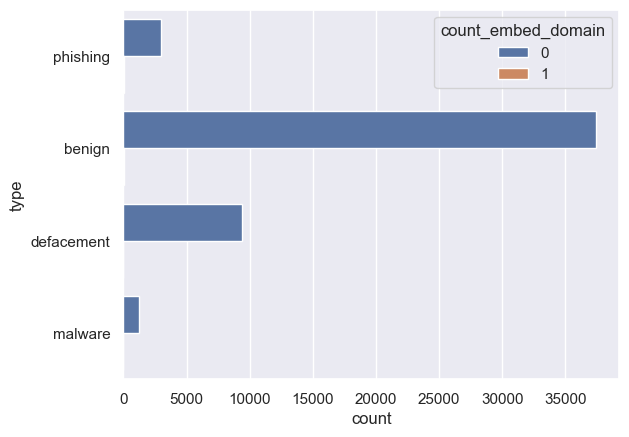

['0' '1']


c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

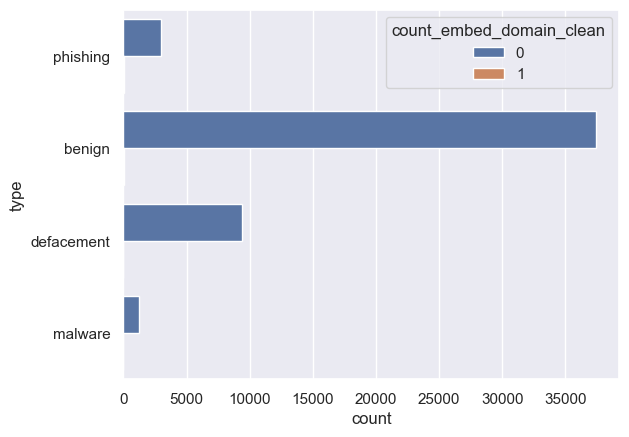

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'count_embed_domain' column is of string type
dataset['count_embed_domain'] = dataset['count_embed_domain'].astype(str)

# Set Seaborn style
sns.set(style='darkgrid')

# Create the countplot
ax = sns.countplot(y='type', data=dataset, hue='count_embed_domain')

# Show the plot
plt.show()
# Print unique values in the 'count_embed_domain' column
print(dataset['count_embed_domain'].unique())

# Handle any unexpected values or missing data if necessary
dataset['count_embed_domain'].fillna('Unknown', inplace=True)
# Rename column if necessary
dataset.rename(columns={'count_embed_domain': 'count_embed_domain_clean'}, inplace=True)

# Create the countplot with the renamed column
ax = sns.countplot(y='type', data=dataset, hue='count_embed_domain_clean')

# Show the plot
plt.show()


c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

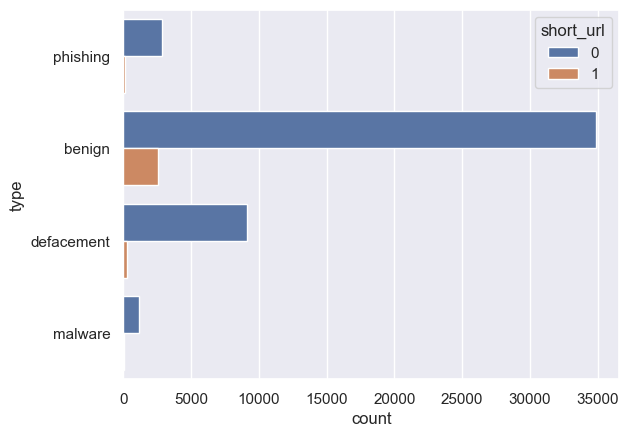

['0' '1']
Index(['url', 'type', 'use_of_ip', 'abnormal_url', 'count.', 'count-www',
       'count_at', 'count_dir_clean', 'count_embed_domain_clean', 'short_url',
       'count-https', 'count-http', 'fd_length', 'tld_length'],
      dtype='object')


c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

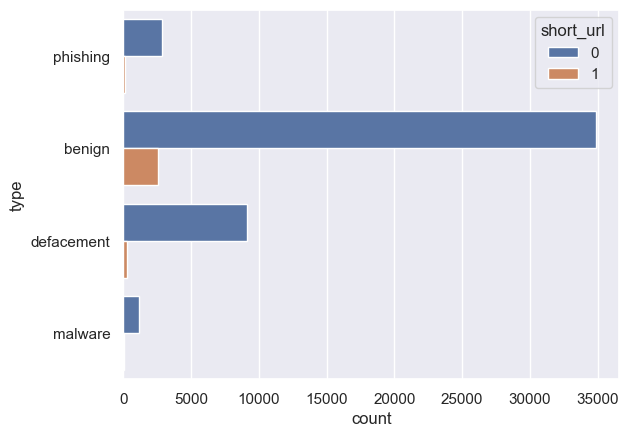

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'short_url' column is of string type
dataset['short_url'] = dataset['short_url'].astype(str)

# Set Seaborn style
sns.set(style='darkgrid')

# Create the countplot
ax = sns.countplot(y='type', data=dataset, hue='short_url')

# Show the plot
plt.show()
# Print unique values in the 'short_url' column
print(dataset['short_url'].unique())

# Handle any unexpected values or missing data if necessary
dataset['short_url'].fillna('Unknown', inplace=True)
# Check column names in the dataset
print(dataset.columns)

# Confirm 'short_url' column exists and is correctly named
if 'short_url' in dataset.columns:
    ax = sns.countplot(y='type', data=dataset, hue='short_url')
    plt.show()
else:
    print("Column 'short_url' does not exist in the dataset.")


TARGET ENCOADINIG

In [41]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
dataset['type_code'] = lb_make.fit_transform(dataset['type'])
dataset['type_code'].value_counts()

type_code
4    522453
0     37416
1      9362
3      3000
2      1221
Name: count, dtype: int64

Creation of Feature and target

In [42]:
import pandas as pd

# Print the actual column names in the DataFrame
print("Columns in the DataFrame:", dataset.columns)
# List of columns you want to select
columns_to_select = ['use_of_ip', 'abnormal_url', 'count.', 'count-www', 'count@', 'count_dir', 'count_embed_domain', 'short_url', 'count-https', 'count-http', 'fd_length']

# Check which columns are not found in the DataFrame
missing_columns = [col for col in columns_to_select if col not in dataset.columns]
if missing_columns:
    print(f"Columns not found in DataFrame: {missing_columns}")
else:
    print("All columns are present in the DataFrame.")
# Example: Update column names based on what you find in the DataFrame
# Use the actual column names you found
columns_to_select_corrected = ['use_of_ip', 'abnormal_url', 'count.', 'count-www', 'count@', 'count_dir', 'count_embed_domain', 'short_url', 'count-https', 'count-http', 'fd_length']

# Ensure that only existing columns are selected
x = dataset[[col for col in columns_to_select_corrected if col in dataset.columns]]
y = dataset['type_code']
# Ensure that the DataFrame selection only includes available columns
x = dataset[[col for col in columns_to_select if col in dataset.columns]]


Columns in the DataFrame: Index(['url', 'type', 'use_of_ip', 'abnormal_url', 'count.', 'count-www',
       'count_at', 'count_dir_clean', 'count_embed_domain_clean', 'short_url',
       'count-https', 'count-http', 'fd_length', 'tld_length', 'type_code'],
      dtype='object')
Columns not found in DataFrame: ['count@', 'count_dir', 'count_embed_domain']


In [43]:
x.head()

,use_of_ip,abnormal_url,count.,count-www,short_url,count-https,count-http,fd_length
0,1,0,2,0,0,0,0,0
1,1,0,2,0,0,0,0,5
2,1,0,2,0,0,0,0,7
3,1,0,3,1,0,0,1,9
4,1,0,2,0,0,0,1,9


In [44]:
x.columns

Index(['use_of_ip', 'abnormal_url', 'count.', 'count-www', 'short_url',
       'count-https', 'count-http', 'fd_length'],
      dtype='object')

In [45]:
dataset.shape

(573452, 15)

TRAIN TEST SPLIT

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

MODEL BUILDING

In [47]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load and preprocess dataset
# dataset = pd.read_csv('your_dataset.csv')  # Uncomment and modify this line based on your data source

# Convert categorical columns to numeric (if needed)
categorical_columns = ['use_of_ip', 'count.', 'count-www', 'short_url']
for column in categorical_columns:
    if column in dataset.columns:
        le = LabelEncoder()
        dataset[column] = le.fit_transform(dataset[column].astype(str))

# Print columns of the dataset to verify
print("Dataset columns:", dataset.columns)

# Prepare features and target
# Modify the column list based on the available columns in your dataset
x = dataset[['use_of_ip', 'abnormal_url', 'count.', 'count-www', 'short_url', 'count-https', 'count-http', 'fd_length']]
y = dataset['type_code']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Train the RandomForest model
rf = RandomForestClassifier(n_estimators=100, max_features='sqrt')
rf.fit(x_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(x_test)

# Verify unique classes
unique_classes = set(y_test)
print("Unique classes in y_test:", unique_classes)
num_classes = len(unique_classes)
print("Number of unique classes:", num_classes)

# Update target_names based on the unique classes
# Ensure target_names list matches the unique classes in your dataset
target_names = ['benign', 'defacement', 'phishing', 'malware', 'unknown']  # Example

# Print the classification report
print(classification_report(y_test, y_pred_rf, target_names=target_names))

# Calculate and print accuracy
score = metrics.accuracy_score(y_test, y_pred_rf)
print('Accuracy: %0.3f' % score)


Dataset columns: Index(['url', 'type', 'use_of_ip', 'abnormal_url', 'count.', 'count-www',
       'count_at', 'count_dir_clean', 'count_embed_domain_clean', 'short_url',
       'count-https', 'count-http', 'fd_length', 'tld_length', 'type_code'],
      dtype='object')
Unique classes in y_test: {0, 1, 2, 3, 4}
Number of unique classes: 5
              precision    recall  f1-score   support

      benign       0.93      0.98      0.96     11236
  defacement       0.89      0.93      0.91      2778
    phishing       0.75      0.46      0.57       362
     malware       0.71      0.18      0.29       922
     unknown       1.00      1.00      1.00    156738

    accuracy                           0.99    172036
   macro avg       0.86      0.71      0.74    172036
weighted avg       0.99      0.99      0.99    172036

Accuracy: 0.992


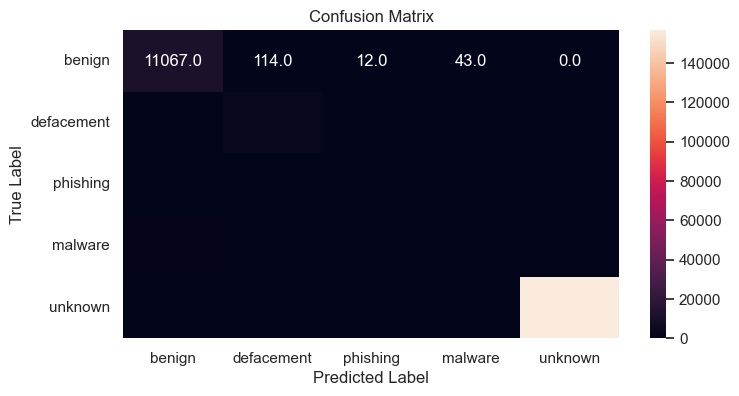

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Determine the number of unique classes
num_classes = cm.shape[0]

# Define labels based on the number of classes
# Update this list based on your actual class names
labels = ['benign', 'defacement', 'phishing', 'malware', 'unknown']  # Adjust as needed

# Ensure the number of labels matches the confusion matrix dimensions
if len(labels) != num_classes:
    raise ValueError(f"Number of labels ({len(labels)}) does not match the number of classes in confusion matrix ({num_classes}).")

# Create DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(cm_df, annot=True, fmt='.1f')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


Light GBM classifier

In [49]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load your dataset
# dataset = pd.read_csv('your_dataset.csv')  # Uncomment and modify this line based on your data source

# Print the column names to verify which columns are present
print("Columns in the DataFrame:", dataset.columns)

# Convert categorical columns to numeric using Label Encoding
categorical_columns = ['use_of_ip', 'count.', 'count-www', 'short_url']  # Replace with actual categorical columns
label_encoders = {}

for column in categorical_columns:
    if column in dataset.columns:
        le = LabelEncoder()
        dataset[column] = le.fit_transform(dataset[column].astype(str))
        label_encoders[column] = le
    else:
        print(f"Column {column} not found in the dataset.")

# Verify columns you want to select
required_columns = ['use_of_ip', 'abnormal_url', 'count.', 'count-www', 'count@', 'count_dir', 'count_embed_domain', 'short_url', 'count-https', 'count-http', 'fd_length']
missing_columns = [col for col in required_columns if col not in dataset.columns]

if missing_columns:
    print(f"Columns not found in DataFrame: {missing_columns}")
else:
    # Prepare features and target
    x = dataset[required_columns]
    y = dataset['type_code']

    # Split the data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

    # Create a LightGBM classifier with appropriate settings
    lgb = LGBMClassifier(objective='multiclass', boosting_type='gbdt', n_jobs=5, verbosity=-1, random_state=5)
    LGB_C = lgb.fit(x_train, y_train)

    # Make predictions
    y_pred_lgb = LGB_C.predict(x_test)

    # Print classification report
    report = classification_report(y_test, y_pred_lgb, target_names=['benign', 'defacement', 'phishing', 'malware'])
    print(report)

    # Calculate and print accuracy
    score = accuracy_score(y_test, y_pred_lgb)
    print('Accuracy: %0.3f' % score)


Columns in the DataFrame: Index(['url', 'type', 'use_of_ip', 'abnormal_url', 'count.', 'count-www',
       'count_at', 'count_dir_clean', 'count_embed_domain_clean', 'short_url',
       'count-https', 'count-http', 'fd_length', 'tld_length', 'type_code'],
      dtype='object')
Columns not found in DataFrame: ['count@', 'count_dir', 'count_embed_domain']


In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your dataset
# dataset = pd.read_csv('your_dataset.csv')  # Uncomment and modify this line based on your data source

# Convert categorical columns to numeric using Label Encoding
categorical_columns = ['use_of_ip', 'count.', 'count-www', 'short_url']  # Replace with actual categorical columns
label_encoders = {}

for column in categorical_columns:
    if column in dataset.columns:
        le = LabelEncoder()
        dataset[column] = le.fit_transform(dataset[column].astype(str))
        label_encoders[column] = le
    else:
        print(f"Column {column} not found in the dataset.")

# Verify columns you want to select
required_columns = ['use_of_ip', 'abnormal_url', 'count.', 'count-www', 'count@', 'count_dir', 'count_embed_domain', 'short_url', 'count-https', 'count-http', 'fd_length']
missing_columns = [col for col in required_columns if col not in dataset.columns]

if missing_columns:
    print(f"Columns not found in DataFrame: {missing_columns}")
else:
    # Prepare features and target
    x = dataset[required_columns]
    y = dataset['type_code']

    # Split the data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

    # Create a LightGBM classifier with appropriate settings
    lgb = LGBMClassifier(objective='multiclass', boosting_type='gbdt', n_jobs=5, verbosity=-1, random_state=5)
    LGB_C = lgb.fit(x_train, y_train)

    # Make predictions
    y_pred_lgb = LGB_C.predict(x_test)

    # Print classification report
    report = classification_report(y_test, y_pred_lgb, target_names=['benign', 'defacement', 'phishing', 'malware'])
    print(report)

    # Calculate and print accuracy
    score = accuracy_score(y_test, y_pred_lgb)
    print('Accuracy: %0.3f' % score)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred_lgb)
    cm_df = pd.DataFrame(cm,
                         index=['benign', 'defacement', 'phishing', 'malware'],
                         columns=['benign', 'defacement', 'phishing', 'malware'])

    plt.figure(figsize=(8,4))
    sns.heatmap(cm_df, annot=True, fmt='.1f', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Real Value')
    plt.xlabel('Predicted Value')
    plt.show()


Columns not found in DataFrame: ['count@', 'count_dir', 'count_embed_domain']


XGboost Classifier

In [51]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Example DataFrame
# dataset = pd.read_csv('your_dataset.csv')  # Uncomment and modify this line based on your data source

# Convert categorical columns to numeric using Label Encoding
categorical_columns = ['use_of_ip', 'count.', 'count-www', 'short_url']  # Replace with actual categorical columns
label_encoders = {}

for column in categorical_columns:
    if column in dataset.columns:
        le = LabelEncoder()
        dataset[column] = le.fit_transform(dataset[column].astype(str))
        label_encoders[column] = le
    else:
        print(f"Column {column} not found in the dataset.")

# Prepare features and target
required_columns = ['use_of_ip', 'abnormal_url', 'count.', 'count-www', 'count@', 'count_dir', 'count_embed_domain', 'short_url', 'count-https', 'count-http', 'fd_length']
missing_columns = [col for col in required_columns if col not in dataset.columns]

if missing_columns:
    print(f"Columns not found in DataFrame: {missing_columns}")
else:
    # Prepare features and target
    x = dataset[required_columns]
    y = dataset['type_code']

    # Split the data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

    # Create and fit the XGBoost classifier
    xgb_c = xgb.XGBClassifier(n_estimators=100)
    xgb_c.fit(x_train, y_train)

    # Make predictions
    y_pred_x = xgb_c.predict(x_test)

    # Print classification report
    report = classification_report(y_test, y_pred_x, target_names=['benign', 'defacement', 'phishing', 'malware'])
    print(report)

    # Calculate and print accuracy
    score = accuracy_score(y_test, y_pred_x)
    print('Accuracy: %0.3f' % score)


Columns not found in DataFrame: ['count@', 'count_dir', 'count_embed_domain']


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Example DataFrame
# dataset = pd.read_csv('your_dataset.csv')  # Uncomment and modify this line based on your data source

# Convert categorical columns to numeric using Label Encoding
categorical_columns = ['use_of_ip', 'count.', 'count-www', 'short_url']  # Replace with actual categorical columns
label_encoders = {}

for column in categorical_columns:
    if column in dataset.columns:
        le = LabelEncoder()
        dataset[column] = le.fit_transform(dataset[column].astype(str))
        label_encoders[column] = le
    else:
        print(f"Column {column} not found in the dataset.")

# Prepare features and target
required_columns = ['use_of_ip', 'abnormal_url', 'count.', 'count-www', 'count@', 'count_dir', 'count_embed_domain', 'short_url', 'count-https', 'count-http', 'fd_length']
missing_columns = [col for col in required_columns if col not in dataset.columns]

if missing_columns:
    print(f"Columns not found in DataFrame: {missing_columns}")
else:
    # Prepare features and target
    x = dataset[required_columns]
    y = dataset['type_code']

    # Split the data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

    # Create and fit the XGBoost classifier
    xgb_c = xgb.XGBClassifier(n_estimators=100)
    xgb_c.fit(x_train, y_train)

    # Make predictions
    y_pred_x = xgb_c.predict(x_test)

    # Print classification report
    report = classification_report(y_test, y_pred_x, target_names=['benign', 'defacement', 'phishing', 'malware'])
    print(report)

    # Calculate and print accuracy
    score = accuracy_score(y_test, y_pred_x)
    print('Accuracy: %0.3f' % score)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred_x)
    cm_df = pd.DataFrame(cm,
                          index=['benign', 'defacement', 'phishing', 'malware'],
                          columns=['benign', 'defacement', 'phishing', 'malware'])
    
    # Plot confusion matrix
    plt.figure(figsize=(8,4))
    sns.heatmap(cm_df, annot=True, fmt='.1f')
    plt.title('Confusion Matrix')
    plt.ylabel('Real Value')
    plt.xlabel('Predicted Value')
    plt.show()


Columns not found in DataFrame: ['count@', 'count_dir', 'count_embed_domain']


Columns in dataset: Index(['url', 'type', 'use_of_ip', 'abnormal_url', 'count.', 'count-www',
       'count_at', 'count_dir_clean', 'count_embed_domain_clean', 'short_url',
       'count-https', 'count-http', 'fd_length', 'tld_length', 'type_code'],
      dtype='object')


c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

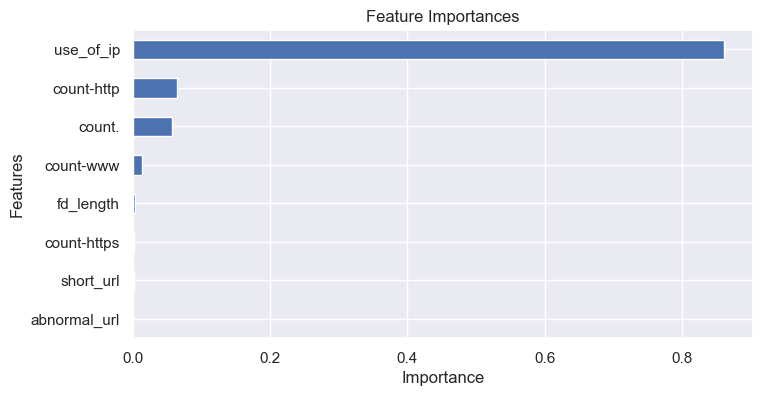

In [53]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load dataset (replace with your actual data loading code)
# dataset = pd.read_csv('your_dataset.csv')

# Print column names to debug
print("Columns in dataset:", dataset.columns)

# Convert categorical columns to numeric using Label Encoding
categorical_columns = ['use_of_ip', 'count.', 'count-www', 'short_url']
for column in categorical_columns:
    if column in dataset.columns:
        le = LabelEncoder()
        dataset[column] = le.fit_transform(dataset[column].astype(str))

# Update column list based on actual dataset columns
# Modify this list to match the columns actually present in your dataset
columns = ['use_of_ip', 'abnormal_url', 'count.', 'count-www', 'short_url', 'count-https', 'count-http', 'fd_length']

# Prepare features and target
x = dataset[columns]
y = dataset['type_code']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Create and fit the XGBoost classifier
xgb_c = xgb.XGBClassifier(n_estimators=100)
xgb_c.fit(x_train, y_train)

# Check if the model is fitted before accessing feature_importances_
if xgb_c._Booster is not None:
    feat_importances = pd.Series(xgb_c.feature_importances_, index=x_train.columns)
    feat_importances.sort_values().plot(kind="barh", figsize=(8, 4))
    plt.title('Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()
else:
    print("Model is not fitted yet.")


PREDICTION

In [54]:
def main(url):
  status = []



  status.append(having_ip_address(url))
  status.append(abnormal_url(url))
  status.append(count_dot(url))
  status.append(count_www(url))
  status.append(count_atrate(url))
  status.append(no_of_dir(url))
  status.append(no_of_embed(url))

  #status.append(shortening_services(url))
  #status.append(count_https(url))
  #status.append(count_http(url))

  #status.append(count_per(url))
  #status.append(count_ques(url))
  #status.append(count_hyphen(url))
  #status.append(count_equal(url))

  #status.append(url_length(url))
  #status.append(hostname_length(url))
  #status.append(suspicious_words(url))
  #status.append(digit_count(url))
  #status.append(letter_count(url))
  #status.append(fd_length(url))
  tld = get_tld(url,fail_silently=True)

  status.append(tld_length(tld))

  return status

In [55]:
def get_prediction_from_url(test_url):
  features_test = main(test_url)
  features_test = np.array(features_test).reshape(1,-1)


  pred = lgb.predict(features_test)
  if int(pred[0]) == 0:
    res="BENIGN,IT'S SAFE TO USE"
    return res

  elif int(pred[0]) == 1.0:
    res="DEFACEMENT"
    return res

  elif int(pred[0]) == 2.0:
    res="PHISHIN"
    return res

  elif int(pred[0]) == 3.0:
    res="PHISHING"
    return res

In [57]:
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier

# Define your model
lgb = LGBMClassifier(objective='multiclass', boosting_type='gbdt', n_jobs=5, verbosity=-1, random_state=5)

# Prepare your training data
# Ensure `x_train` and `y_train` are defined and properly preprocessed
# x_train, y_train = ...

# Fit the model with training data
lgb.fit(x_train, y_train)

def get_prediction_from_url(url):
    # Convert the URL to features
    features_test = main(url)  # Replace `main(url)` with actual feature extraction code
    features_test = np.array(features_test).reshape(1, -1)
    
    # Predict using the trained model
    pred = lgb.predict(features_test)
    if int(pred[0]) == 0:
        return "BENIGN, IT'S SAFE TO USE"
    elif int(pred[0]==1):
        return "Defacement"
    elif int(pred[0]==2):
        return "Phishing"
    elif int(pred[0]==3):
        return "Malware"
    
    

# Test with sample URLs
urls = ["https://www.kaggle.com/search"]
for url in urls:
    print(get_prediction_from_url(url))


Defacement
